<a id=1000></a>
# [Loading Dataset]()

# [Basic EDA]()



# 2 [Text Preprocessing and Training the Models](#2)

### 2.1: [Stop words Removal](#2.1)
##### 2.1.1: [KNN & its performance Metrics](#2.1.1)
##### 2.1.2: [NB & its performance Metrics](#2.1.2)
##### 2.1.3: [LR & its performance Metrics](#2.1.3)
##### 2.1.4: [DT & its performance Metrics](#2.1.4)   
##### 2.1.5: [RF & its performance Metrics](#2.1.5)
##### 2.1.6: [SVM & its performance Metrics](#2.1.6)

# B: [accuracy chart---after stopwords removal](#B)


### 2.2:[Other Text preprocessing Techniques and Model Traings](#2.2)
##### 2.2.1: [KNN & its performance Metrics](#2.2.1)
##### 2.2.2: [NB & its performance Metrics](#2.2.2)
##### 2.2.3: [LR & its performance Metrics](#2.2.3)
##### 2.2.4: [DT & its performance Metrics](#2.2.4)   
##### 2.2.5: [RF & its performance Metrics](#2.2.5)
##### 2.2.6: [SVM & its performance Metrics](#2.2.6)

# C: [accuracy chart--after Applying other Text Preprocessing Technique](#C)




# Packeges:

In [1]:
# packeges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Text vectorizer packeges.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec


# modeling related packeges
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Text Pre-processing packeges
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('omw-1.4')
#nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import gensim
import gensim.downloader as api
from gensim.models import KeyedVectors
from wordcloud import WordCloud


#performance related metircs
from sklearn.metrics import roc_auc_score,roc_curve, auc,accuracy_score
from sklearn.metrics import confusion_matrix




In [2]:
# loading dataset
df=pd.read_excel("EmotionDescription.xlsx")

In [4]:
#Basic EDA
print(df.shape)

print("="*100)

print(df.columns)

print("="*100)

print(df.isnull().sum())
print("="*100)
df.head(10)

(7666, 2)
Index(['Target', 'Text'], dtype='object')
Target    0
Text      0
dtype: int64


,Target,Text
0,anger,When a boy tried to fool me so he would be OK ...
1,anger,I felt anger when I saw that I was being misle...
2,anger,Once a friend had pushed me and I had fallen o...
3,anger,When I was misleaded by a person who assured t...
4,anger,I don't use to lie to my parets about what I d...
5,anger,During the short period of my unemployment abo...
6,anger,When my chief accused me of an error that I ha...
7,anger,A girl entered in the division where I work an...
8,anger,"When I was dancing with a dame at a social, on..."
9,anger,My mother was ill and asked me to prpare our l...


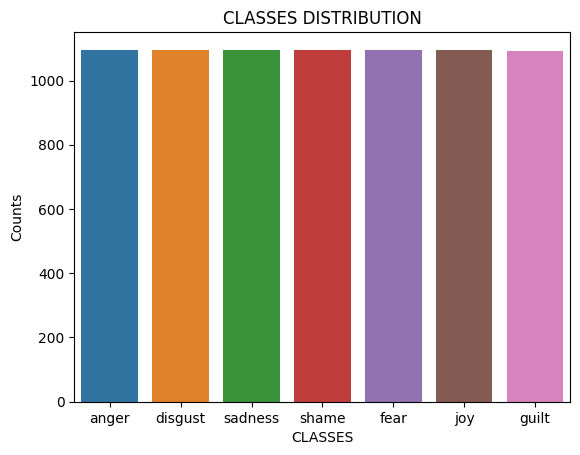

In [7]:
#Classes Distribution
value_indexs=df.Target.value_counts().index
values_Counts=df.Target.value_counts()

sns.barplot(x=value_indexs,y=values_Counts)
plt.xlabel("CLASSES")
plt.ylabel("Counts")
plt.title("CLASSES DISTRIBUTION")
plt.show()

 Obeservation:
 
 The dataset is not imblanced every class datapoints in approximately equal number of points. 
 
 We have seven Classes.
 
 

In [8]:
#models=["KNN","NB","LR","DT","RF","SVM"]
#overAll_Train_accuracy=[]
#overAll_Test_accuracy=[]


#Separating the traget classes
y_df=pd.DataFrame(df["Target"])
final_df=df.drop("Target",axis=1)


#Encodeing the target variable
y_df['Target']=y_df['Target'].map({'anger':0,'disgust':1,'sadness':2,'shame':3,'fear':4,'joy':5,'guilt':6})

y_df=np.array(y_df)
y_df = np.ravel(y_df)

In [9]:
#vectorizing the text of whole corpus Throug BOW count vecterizor


# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Vectorize the corpus
vectorized_data = vectorizer.fit_transform(final_df['Text'])

vectorized_data

<7666x8934 sparse matrix of type '<class 'numpy.int64'>'
	with 129343 stored elements in Compressed Sparse Row format>

In [10]:
#spliting the data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, y_df, test_size=0.20,random_state=42)

#spliting the train test into train and cross-validation sets
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20)

<a id=2></a>

# 2: [Text Preprocessing and Training the Models](#1000)

<a id=2.1></a>
# 2.1: Stop Words Removal 

In [24]:
models=["KNN","NB","LR","DT","RF","SVM"]
overAll_Train_accuracy=[]
overAll_Test_accuracy=[]


# loading dataset
df=pd.read_excel("EmotionDescription.xlsx")

# Separating the traget classes
y_df=pd.DataFrame(df["Field1"])
final_df=df.drop("Field1",axis=1)



#Encodeing the target variable
y_df['Field1']=y_df['Field1'].map({'anger':0,'disgust':1,'sadness':2,'shame':3,'fear':4,'joy':5,'guilt':6})
y_df=np.array(y_df)
y_df = np.ravel(y_df)



# Tokenize each document
final_df['SIT'] = final_df['SIT'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
final_df['SIT'] = final_df['SIT'].apply(lambda x: [word for word in x if word not in stop_words])


In [25]:
#vectorizing the text of whole corpus Throug BOW count vecterizor
text_array=np.array(final_df)
text_list=text_array.tolist()


# user define function to convert whole corpus to vectors using the BOW Technique
def vectorizer(text):
    # Ensure all elements are strings
    for i in range(len(text)):
        if not isinstance(text[i], str):
             text[i] = str(text[i])

    # Create TfidfVectorizer object
    vectorizer = CountVectorizer()

    # Fit the vectorizer to the text
    vectorizer.fit(text)
    
    # Transform the text into TF-IDF vectors
    tfidf_vectors = vectorizer.transform(text)
        
    return tfidf_vectors

vectorized_data=vectorizer(text_list) # Function call


#spliting the data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, y_df, test_size=0.20,random_state=42)

<a id=2.1.1></a>
# 2.1.1: [KNN & its performance Metrics](#1000)

Train_Accuracy: 51.19047619047619
Test_Accuracy: 32.13820078226858


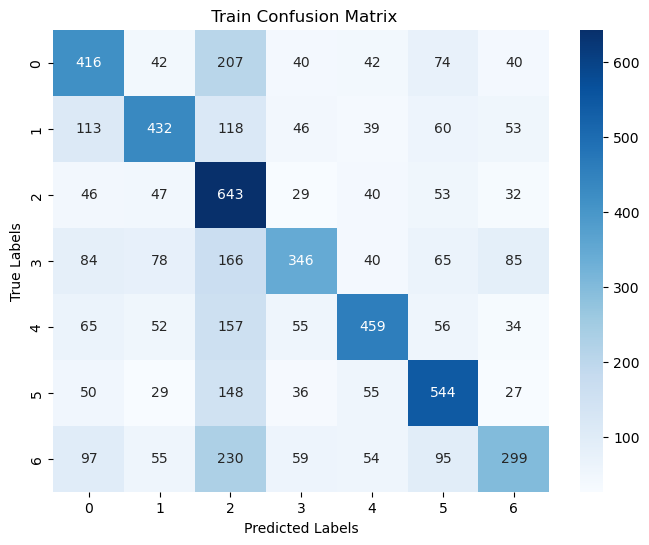

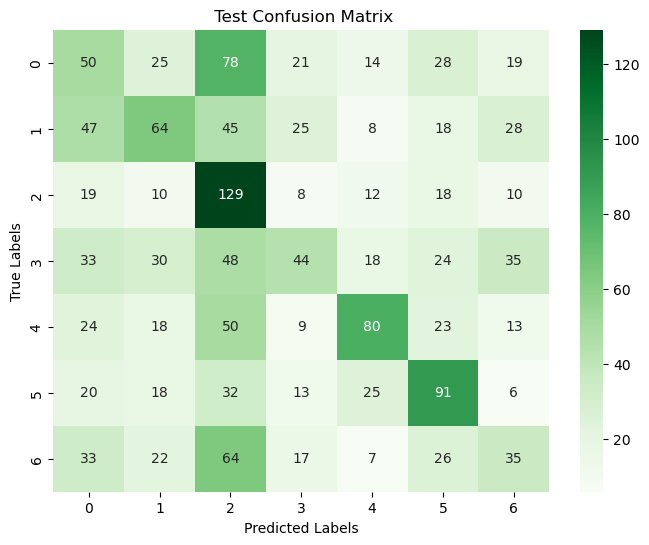

In [26]:
#creating KNN Model
clf=KNeighborsClassifier()
clf.fit(X_train, y_train)


# Calculate accuracy score
accuracy = accuracy_score(y_train,clf.predict(X_train))
print("Train_Accuracy:", accuracy*100)
overAll_Train_accuracy.append(accuracy)

print("="*100)

# Calculate accuracy score
accuracy = accuracy_score(y_test,clf.predict(X_test))
print("Test_Accuracy:", accuracy*100)
overAll_Test_accuracy.append(accuracy)
print("="*100)



#comfusion metric of Train set
cm = confusion_matrix(y_train, clf.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<a id=2.1.2></a>
# 2.1.2: [NB & its performance Metrics](#1000)

Accuracy: 79.99021526418787
Accuracy: 54.95436766623207


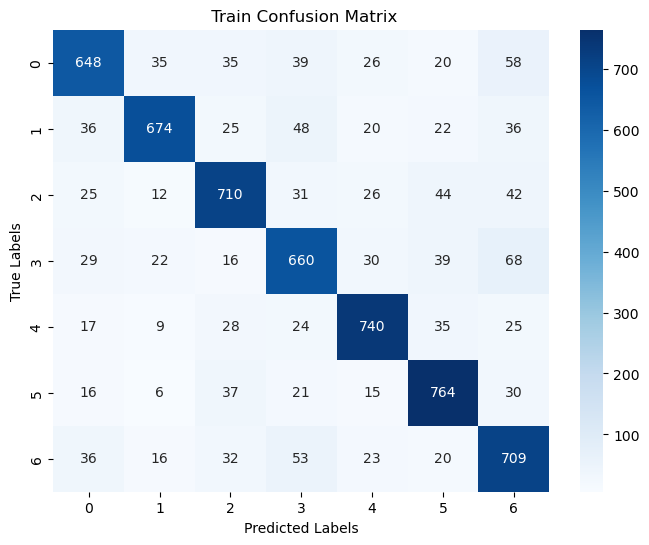

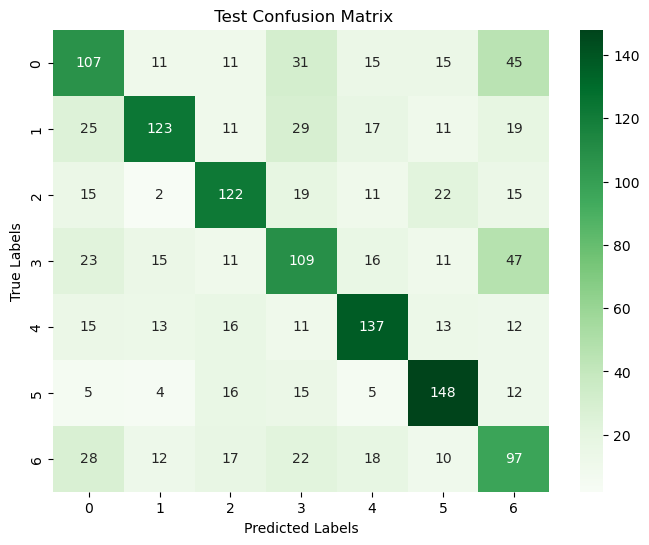

In [27]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

# Calculate accuracy of trian set
accuracy = accuracy_score(y_train, nb_classifier.predict(X_train))
overAll_Train_accuracy.append(accuracy)
print("Accuracy:", accuracy*100)

print("="*100)

# Calculate accuracy of trian set
accuracy = accuracy_score(y_test, nb_classifier.predict(X_test))
print("Accuracy:", accuracy*100)
overAll_Test_accuracy.append(accuracy)
print("="*100)



#comfusion metric of Train set
cm = confusion_matrix(y_train, nb_classifier.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, nb_classifier.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<a id=2.1.3></a>
# 2.1.3: [LR & its performance Metrics](#1000)

Train_Accuracy: 0.9254729288975865
Test_Accuracy: 0.5573663624511083


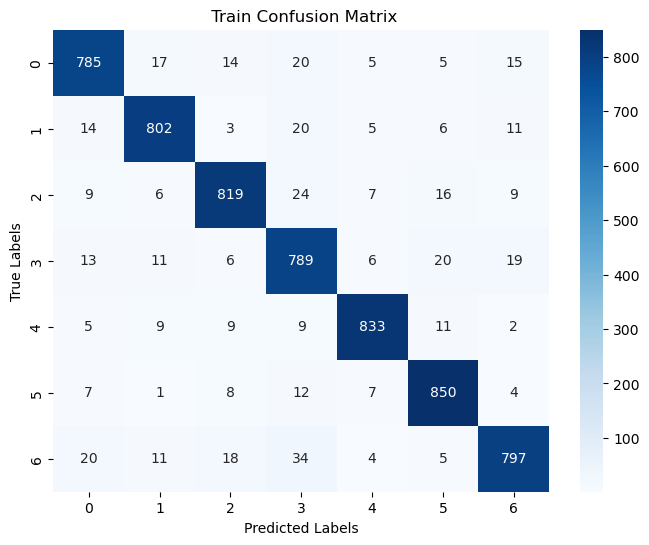

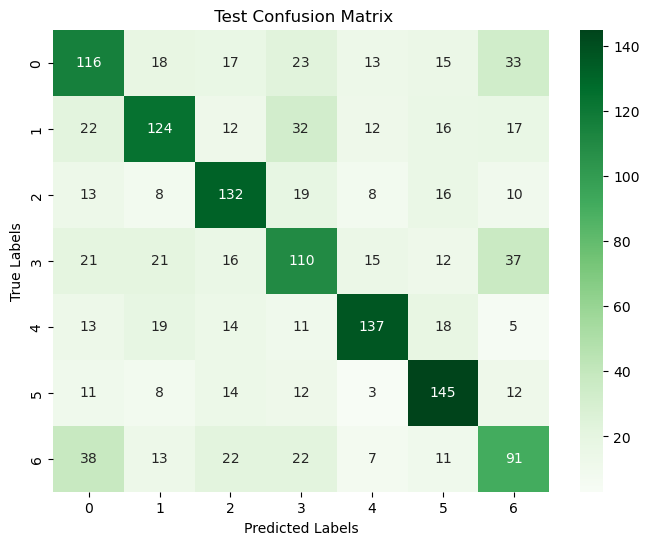

In [28]:
# Train a logistic regression model
Lr = LogisticRegression(multi_class='multinomial',solver="sag")
Lr.fit(X_train, y_train)


# Make predictions on the train set
y_pred = Lr.predict(X_train)
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print('Train_Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)

# Calculate accuracy on Test Set
accuracy = accuracy_score(y_test, Lr.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)
print("="*100)


#comfusion metric of Train set
cm = confusion_matrix(y_train, Lr.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Lr.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




<a id=2.1.4></a>
# 2.1.4: [DT & its performance Metrics](#1000)

Train_Accuracy: 0.9859752120026093
Test_Accuracy: 0.4602346805736636


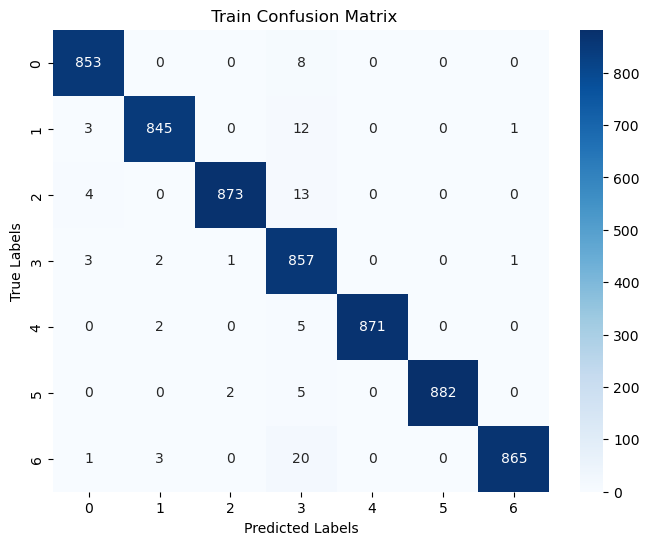

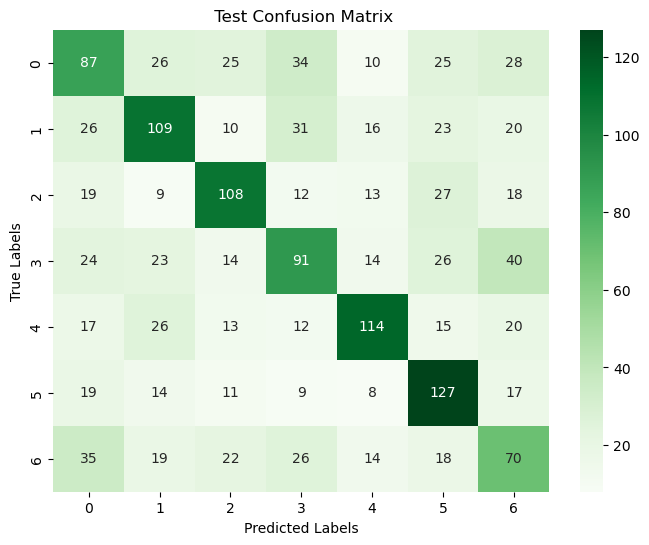

In [29]:

# Train a decision tree model
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

# Make predictions on the Trainset
y_pred = Dt.predict(X_train)

# Calculate accuracy on Train Set
accuracy = accuracy_score(y_train, y_pred)
print('Train_Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)


# Calculate accuracy on Test Set
accuracy = accuracy_score(y_test, Dt.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)

print("="*100)

#comfusion metric of Train set
cm = confusion_matrix(y_train, Dt.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Dt.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<a id=2.1.5></a>
# 2.1.5: [RF & its performance Metrics](#1000)

Train_Accuracy: 98.59752120026093
Test_Accuracy: 52.02086049543677


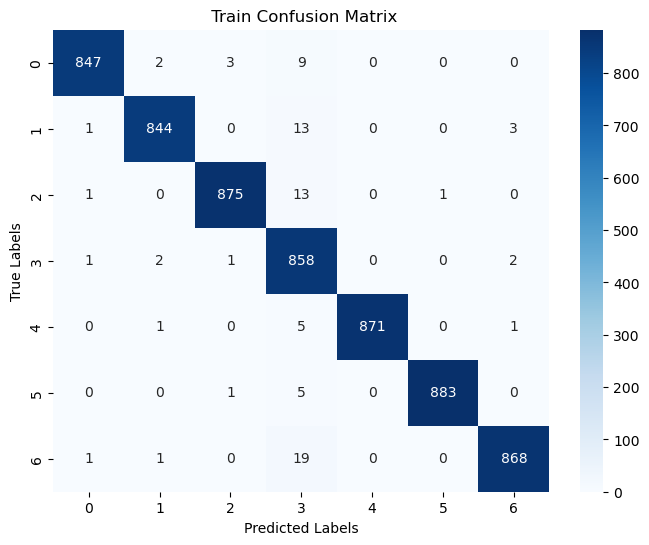

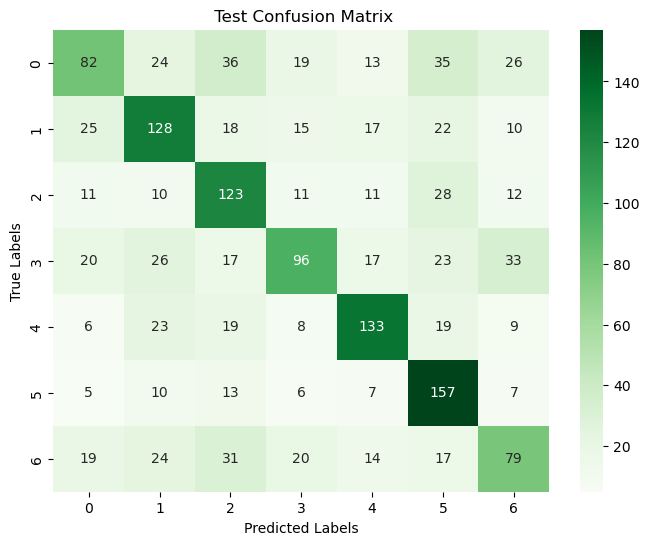

In [30]:
# Create the model
Rf = RandomForestClassifier()
# Train the model
Rf.fit(X_train, y_train)


# Evaluate the model's Train set accuracy
accuracy = accuracy_score(y_train, Rf.predict(X_train))
overAll_Train_accuracy.append(accuracy)
print("Train_Accuracy:", accuracy*100)

print("="*100)


# Evaluate the model's Test set accuracy
accuracy = accuracy_score(y_test, Rf.predict(X_test))
overAll_Test_accuracy.append(accuracy)
print("Test_Accuracy:", accuracy*100)

print("="*100)



#comfusion metric of Train set
cm = confusion_matrix(y_train, Rf.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Rf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


<a id=2.1.6></a>
# 2.1.6: [SVM & its performance Metrics](#1000)

Train Accuracy: 0.958904109589041
Test_Accuracy: 0.5208604954367666


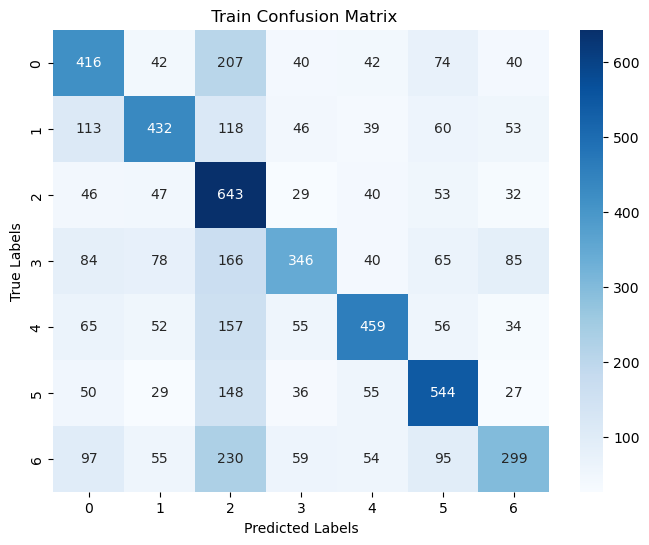

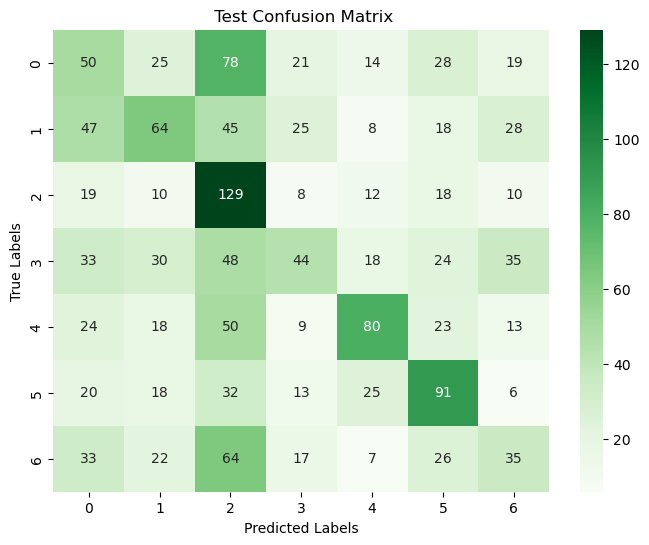

In [31]:


# Train an SVM model
Svm = SVC(kernel='linear')
Svm.fit(X_train, y_train)

# Make predictions on the train set
y_pred = Svm.predict(X_train)

# Calculate accuracy of Train Set
accuracy = accuracy_score(y_train, y_pred)
print('Train Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)

# Calculate accuracy of Test set.
accuracy = accuracy_score(y_test, Svm.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)

print("="*100)




#comfusion metric of Train set
cm = confusion_matrix(y_train, clf.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


<a id=B></a>
# B: [accuracy chart---after stopwords removal](#1000)

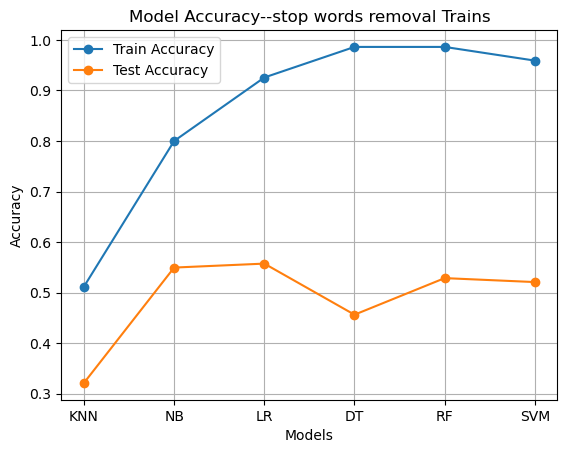

In [29]:
# Plotting the line chart
plt.plot(models, overAll_Train_accuracy, marker='o', label='Train Accuracy')
plt.plot(models, overAll_Test_accuracy, marker='o', label='Test Accuracy')

# Set the chart title and labels
plt.title('Model Accuracy--stop words removal Trains')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)
# Add a legend
plt.legend()

<a id=2.2></a>
# 2.2:[Other Text preprocessing Techniques and Model Traings](#1000)

In [14]:

#models=["KNN","NB","LR","DT","RF","SVM"]
#overAll_Train_accuracy=[]
#overAll_Test_accuracy=[]
# loading dataset
df=pd.read_excel("EmotionDescription.xlsx")

# Separating the traget classes
y_df=pd.DataFrame(df["Target"])
final_df=df.drop("Target",axis=1)



#Encodeing the target variable
y_df['Target']=y_df['Target'].map({'anger':0,'disgust':1,'sadness':2,'shame':3,'fear':4,'joy':5,'guilt':6})
y_df=np.array(y_df)
y_df = np.ravel(y_df)



# user define function definition to clean and preprocess the Text apply every technique.

def Text_cleaner(df):
    # Tokenize each tweet
    df['Text'] = df['Text'].apply(lambda x: word_tokenize(x.lower()))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    df['Text'] = df['Text'].apply(lambda x: [word for word in x if word not in stop_words])
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    df['Text'] = df['Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

     # Stem the tokens
    stemmer = PorterStemmer()
    df['Text'] = df['Text'].apply(lambda x: [stemmer.stem(word) for word in x])

    # Remove special characters  in each tweet
    def remove_symbols_regex(token_list):
        pattern = r'[á!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'  
        cleaned_tokens = [re.sub(pattern, '', token) for token in token_list]
        return cleaned_tokens
    
    
    df['Text'] = df['Text'].apply(remove_symbols_regex)

    return df

# function call to clean the Text and preprocess
final_df=Text_cleaner(final_df)



#vectorizing the text of whole corpus Throug BOW count vecterizor
text_array=np.array(final_df)
text_list=text_array.tolist()


# user define function to convert whole corpus to vectors using the BOW Technique
def vectorizer(text):
    # Ensure all elements are strings
    for i in range(len(text)):
        if not isinstance(text[i], str):
             text[i] = str(text[i])

    # Create TfidfVectorizer object
    vectorizer = CountVectorizer()

    # Fit the vectorizer to the text
    vectorizer.fit(text)
    
    # Transform the text into TF-IDF vectors
    tfidf_vectors = vectorizer.transform(text)
        
    return tfidf_vectors

vectorized_data=vectorizer(text_list) # Function call


#spliting the data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, y_df, test_size=0.20,random_state=42)



<a id=2.2.1></a>
# 2.2.1: [KNN & its performance Metrics](#1000)


Train_Accuracy: 52.544031311154605
Test_Accuracy: 31.095176010430247


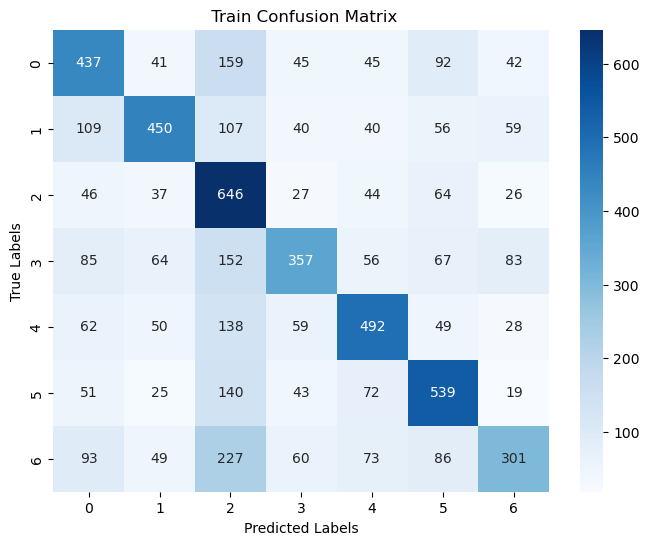

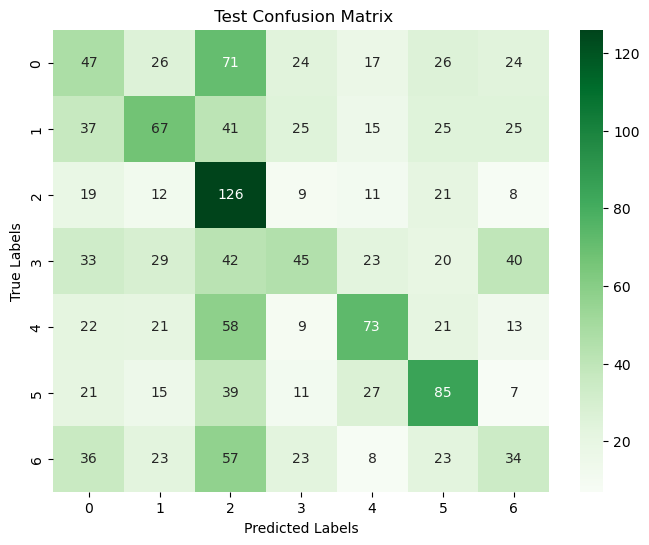

In [33]:
#creating KNN Model
clf=KNeighborsClassifier()
clf.fit(X_train, y_train)


# Calculate accuracy score
accuracy = accuracy_score(y_train,clf.predict(X_train))
print("Train_Accuracy:", accuracy*100)
overAll_Train_accuracy.append(accuracy)

print("="*100)

# Calculate accuracy score
accuracy = accuracy_score(y_test,clf.predict(X_test))
print("Test_Accuracy:", accuracy*100)
overAll_Test_accuracy.append(accuracy)
print("="*100)



#comfusion metric of Train set
cm = confusion_matrix(y_train, clf.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<a id=2.2.2></a>
# 2.2.2: [NB & its performance Metrics](#1000)


Accuracy: 76.54924983692108
Accuracy: 54.69361147327248


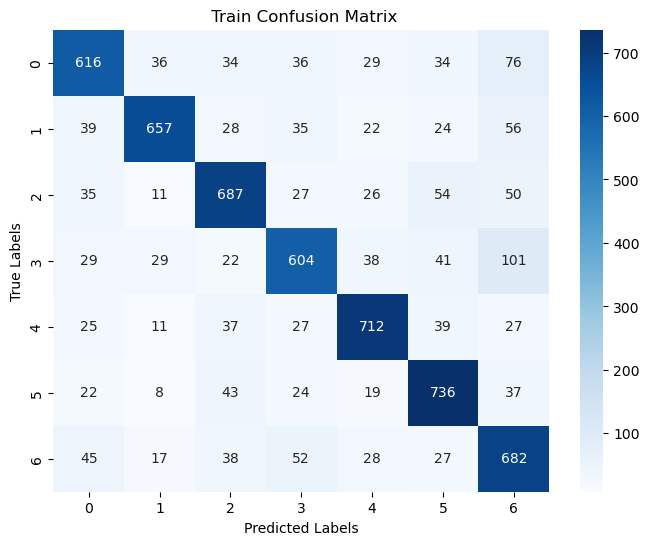

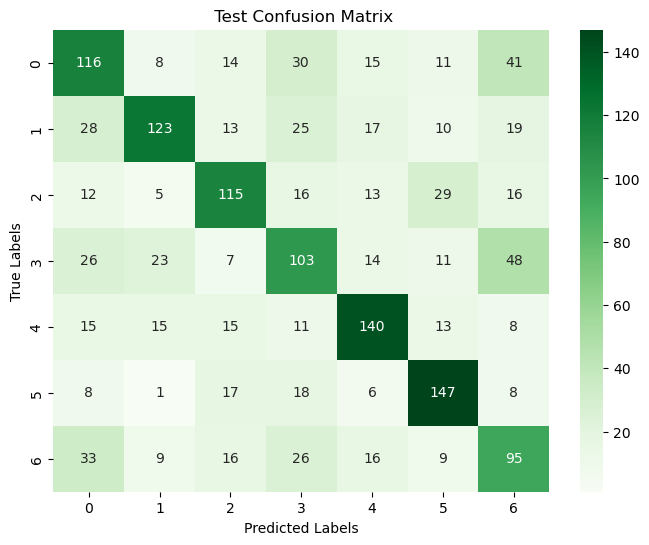

In [34]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

# Calculate accuracy of trian set
accuracy = accuracy_score(y_train, nb_classifier.predict(X_train))
overAll_Train_accuracy.append(accuracy)
print("Accuracy:", accuracy*100)

print("="*100)

# Calculate accuracy of trian set
accuracy = accuracy_score(y_test, nb_classifier.predict(X_test))
print("Accuracy:", accuracy*100)
overAll_Test_accuracy.append(accuracy)
print("="*100)



#comfusion metric of Train set
cm = confusion_matrix(y_train, nb_classifier.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, nb_classifier.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 2.2.3: [LR & its performance Metrics](#1000)
<a id=2.2.3></a>

Train_Accuracy: 0.8993803000652316
Test_Accuracy: 0.5475880052151239


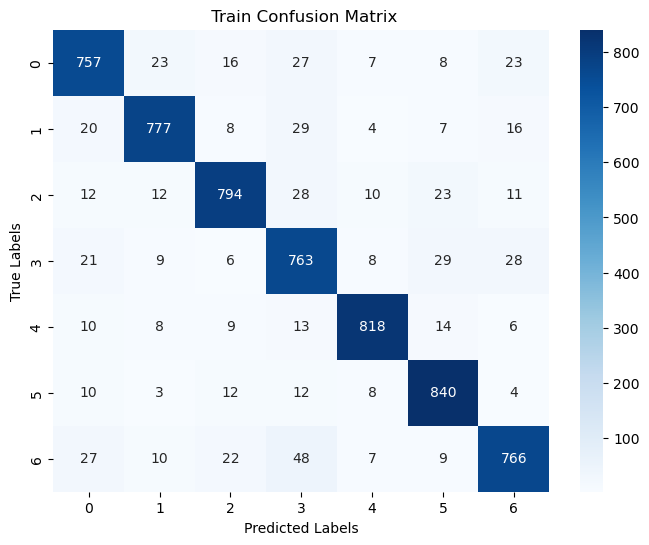

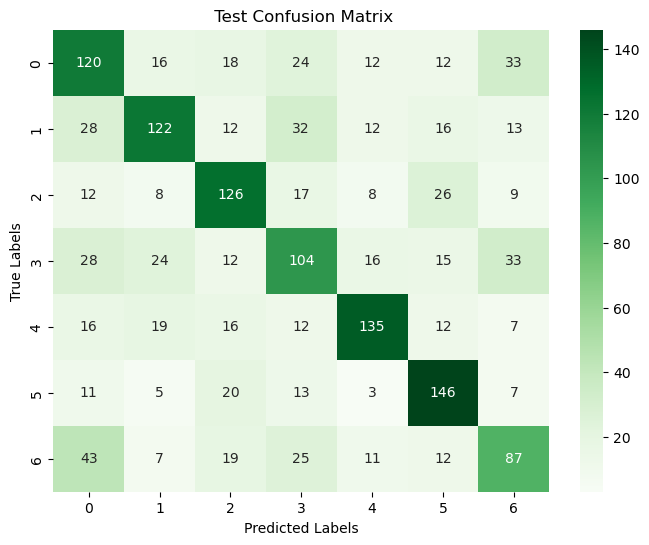

In [35]:
# Train a logistic regression model
Lr = LogisticRegression(multi_class='multinomial',solver="sag")
Lr.fit(X_train, y_train)


# Make predictions on the train set
y_pred = Lr.predict(X_train)
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print('Train_Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)

# Calculate accuracy on Test Set
accuracy = accuracy_score(y_test, Lr.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)
print("="*100)


#comfusion metric of Train set
cm = confusion_matrix(y_train, Lr.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Lr.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




# 2.2.4: [DT & its performance Metrics](#1000)   
<a id=2.2.4></a>

Train_Accuracy: 0.985812133072407
Test_Accuracy: 0.4680573663624511


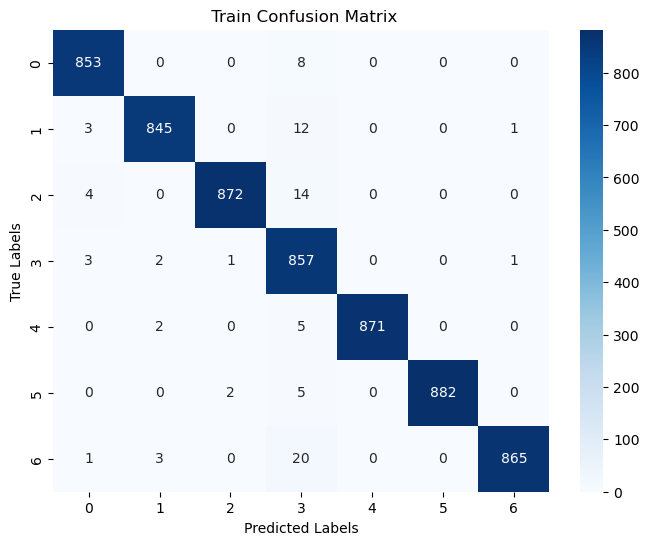

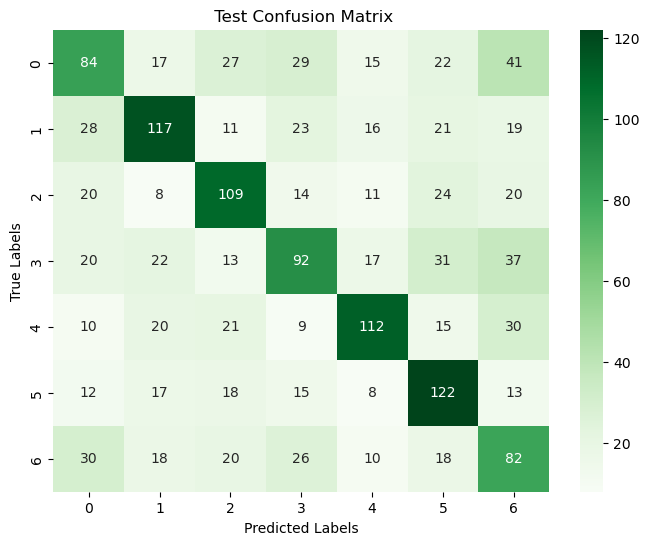

In [36]:

# Train a decision tree model
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

# Make predictions on the Trainset
y_pred = Dt.predict(X_train)

# Calculate accuracy on Train Set
accuracy = accuracy_score(y_train, y_pred)
print('Train_Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)


# Calculate accuracy on Test Set
accuracy = accuracy_score(y_test, Dt.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)

print("="*100)

#comfusion metric of Train set
cm = confusion_matrix(y_train, Dt.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Dt.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 2.2.5: [RF & its performance Metrics](#1000)
<a id=2.2.5></a>

Train_Accuracy: 98.5812133072407
Test_Accuracy: 53.259452411994786


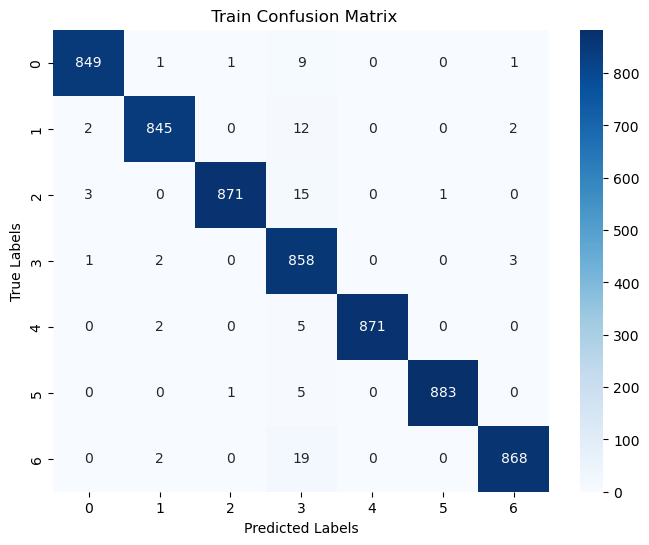

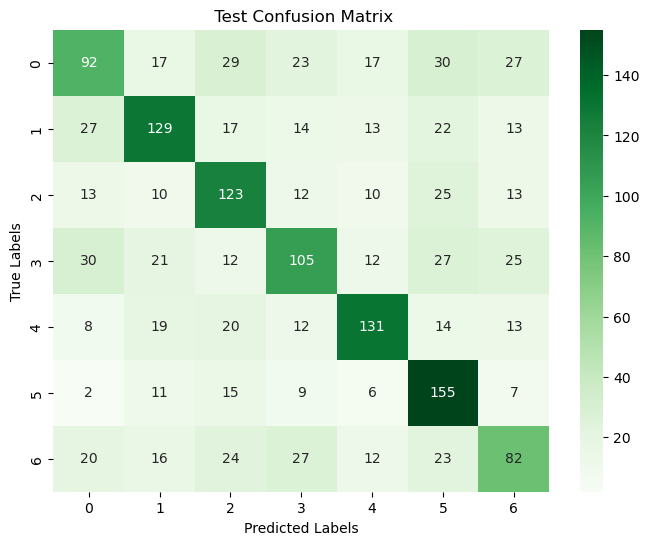

In [37]:
# Create the model
Rf = RandomForestClassifier()
# Train the model
Rf.fit(X_train, y_train)


# Evaluate the model's Train set accuracy
accuracy = accuracy_score(y_train, Rf.predict(X_train))
overAll_Train_accuracy.append(accuracy)
print("Train_Accuracy:", accuracy*100)

print("="*100)


# Evaluate the model's Test set accuracy
accuracy = accuracy_score(y_test, Rf.predict(X_test))
overAll_Test_accuracy.append(accuracy)
print("Test_Accuracy:", accuracy*100)

print("="*100)



#comfusion metric of Train set
cm = confusion_matrix(y_train, Rf.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Rf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# 2.2.6: [SVM & its performance Metrics](#1000)
<a id=2.2.6></a>

Train Accuracy: 0.9422700587084148
Test_Accuracy: 0.516297262059974


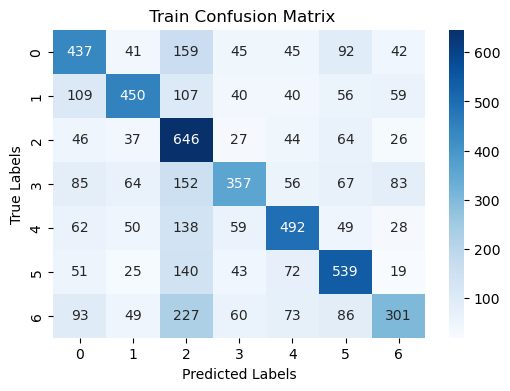

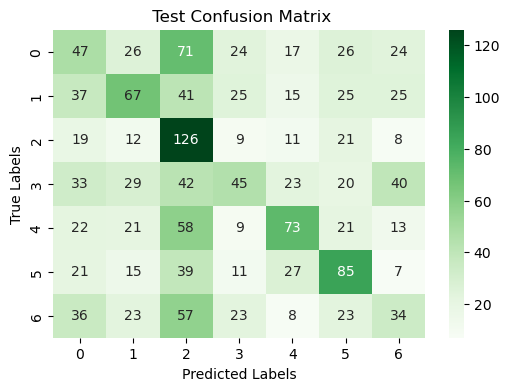

In [38]:


# Train an SVM model
Svm = SVC(kernel='linear')
Svm.fit(X_train, y_train)

# Make predictions on the train set
y_pred = Svm.predict(X_train)

# Calculate accuracy of Train Set
accuracy = accuracy_score(y_train, y_pred)
print('Train Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)

# Calculate accuracy of Test set.
accuracy = accuracy_score(y_test, Svm.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)

print("="*100)




#comfusion metric of Train set
cm = confusion_matrix(y_train, clf.predict(X_train))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# C: [accuracy chart--after Applying other Text Preprocessing Technique](#1000)
<a id=C></a>

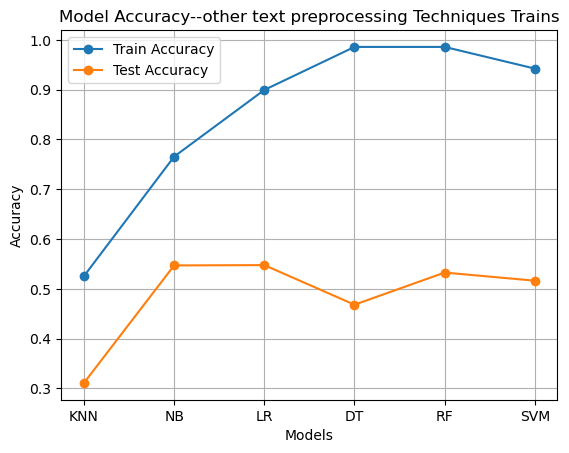

In [39]:
# Plotting the line chart
plt.plot(models, overAll_Train_accuracy, marker='o', label='Train Accuracy')
plt.plot(models, overAll_Test_accuracy, marker='o', label='Test Accuracy')

# Set the chart title and labels
plt.title('Model Accuracy--other text preprocessing Techniques Trains')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)
# Add a legend
plt.legend()